<a href="https://colab.research.google.com/github/sindhu819/Projects/blob/master/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color =blue> Validation and Visualizing the images 

Importing the necessary libraries

In [0]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [75.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

#<font color=blue> Initializing the spark session to 12g

In [0]:
import findspark
findspark.init(os.environ["SPARK_HOME"])# SPARK_HOME
from pyspark.sql.types import Row
from pyspark.sql.functions import col
from pyspark.ml.linalg import Vectors, DenseVector
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession

#spark = SparkSession.builder.master("local[*]").getOrCreate()
Memory_limit = "12g"
spark = SparkSession.builder.appName("Foo").config("spark.executor.memory", Memory_limit).config("spark.driver.memory", Memory_limit).getOrCreate()

import numpy as np
import pandas as pd

#<font color=blue> Mounting to the Google drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#<font color=blue> Creating the pydrive client

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#<font color=blue> Downloading the required files in pydrive

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view

downloaded1 = drive.CreateFile({'id':'1T6FAL8Gn_k7qEexv7yzuOgYoJNqjOX8U'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('train')
downloaded2 = drive.CreateFile({'id':'1T932ddFaS0sJHWXOO1hLicbAp0W04eY6'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('test')
downloaded3 = drive.CreateFile({'id':'1pZ_buxDxG0DKT69zszNGySt_hGSbT0Oi'}) # replace the id with id of file you want to access
downloaded3.GetContentFile('meta')

<font color='blue'>Unpickle all the pickle files. Data is available in different files, train, test. Metadata is available in meta file. </font>

In [0]:
#unpickle the file
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic
# train data
datatrain = unpickle('train')
# test data
datatest = unpickle('test')
# meta data
datameta = unpickle("meta")

#convert the data type from byte to utf-8
fine_labels = [x.decode('utf-8')for x in datameta.get(b'fine_label_names')]
print(fine_labels)
coarse_labels = [x.decode('utf-8')for x in datameta.get(b'coarse_label_names')]
print(coarse_labels)


['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

#<font color=blue>  Reading the saved milestone1 preprocessed file in parquet format

In [0]:
data=spark.read.parquet("/content/drive/My Drive/Project/LSA/Dataset/Cifar.parquet/*")

In [0]:
type(data)

pyspark.sql.dataframe.DataFrame

In [0]:
data.show()

+-------------+--------------------+-----------+----------+
|coarse_labels|                data|fine_labels|labelindex|
+-------------+--------------------+-----------+----------+
|            5|[1.0,0.9960784313...|         39|       0.0|
|            6|[0.79215686274509...|         94|       1.0|
|            5|[1.0,1.0,0.964705...|         22|       0.0|
|            6|[0.26666666666666...|         84|       1.0|
|            6|[0.98039215686274...|         94|       1.0|
|            5|[1.0,1.0,1.0,1.0,...|         40|       0.0|
|            5|[0.28627450980392...|         39|       0.0|
|            5|[0.0,0.0,0.0,0.0,...|         86|       0.0|
|            6|[0.57647058823529...|          5|       1.0|
|            6|[0.92549019607843...|         25|       1.0|
|            6|[0.98823529411764...|         25|       1.0|
|            5|[0.23921568627450...|         22|       0.0|
|            5|[0.02352941176470...|         39|       0.0|
|            6|[0.87843137254901...|    

##<font color=blue> Random Forest
<font color=blue>Applying the Random forest algorithm to the best subset 




In [0]:
import time
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
train_df = data.filter(~col('fine_labels').isin([87,94]))
test_df  = data.filter(col('fine_labels').isin([87,94]))
rfc=RandomForestClassifier(featuresCol="data", labelCol="labelindex",numTrees=200)



<font color=blue>Getting the wall and CPU time in for the random forest for training

In [0]:
%%time
rfc_model=rfc.fit(train_df)


CPU times: user 28 ms, sys: 7.15 ms, total: 35.1 ms
Wall time: 48.1 s


<font color=blue>getting the wall and cpu time for Random forest for prediction

In [0]:
%%time
rfc_preds=rfc_model.transform(test_df)
rfc_eval=BinaryClassificationEvaluator(labelCol="labelindex")
print ("Random Forest: {}%,{},{}".format(rfc_eval.evaluate(rfc_preds)*100,87,94))


Random Forest: 77.01666666666667%,87,94
CPU times: user 10.5 ms, sys: 4.75 ms, total: 15.3 ms
Wall time: 2.57 s


#<font color =blue> Generating random images for test sample

<font color='blue'>created user defined function to add 'coarse' and 'fine' which contains the name of super class and sub class labels.</font>

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import FloatType
from pyspark.mllib.linalg import VectorUDT

# add two columns fine label as fine and corase label as corase,
# add the normalized data column, remove the original data column 
target_name_df = test_df.withColumn("coarse", udf(lambda coarse_label: coarse_labels[coarse_label], StringType())(test_df['coarse_labels'])) \
    .withColumn("fine", udf(lambda fine_label: fine_labels[fine_label], StringType())(test_df['fine_labels']))
    

<font color='blue'>Selected on small fraction of data from the filtered data. This is data is taken to verify the superclass and subclass of our selected data.</font>

In [0]:
# generate sample data randomly
fractions = dict()
for fine in ['clock', 'keyboard', 'lamp', 'telephone', 'television','bed', 'chair', 'couch', 'table', 'wardrobe']:
  fractions[fine] = 0.4

sample_df = target_name_df.sampleBy('fine', fractions)
sample_df.count()

488

<font color='blue'>Selected only 'coarse', 'fine' and 'data' columns which will be needed to display the image with label and converted it into RDD. The image data are sorted by coarse label first and then by fine labels, This is maintain order while displaying the images.</font>

In [0]:
# generate the samples list
samples = sample_df.select('coarse', 'fine', 'data').orderBy('coarse', 'fine').rdd.collect()

<font color='blue'>Created a function to display validation images with its label. A counter value is assigned for each values, to make sure that only 4 images are displayed under each category. Matplotlib is used to display the figures. </font>

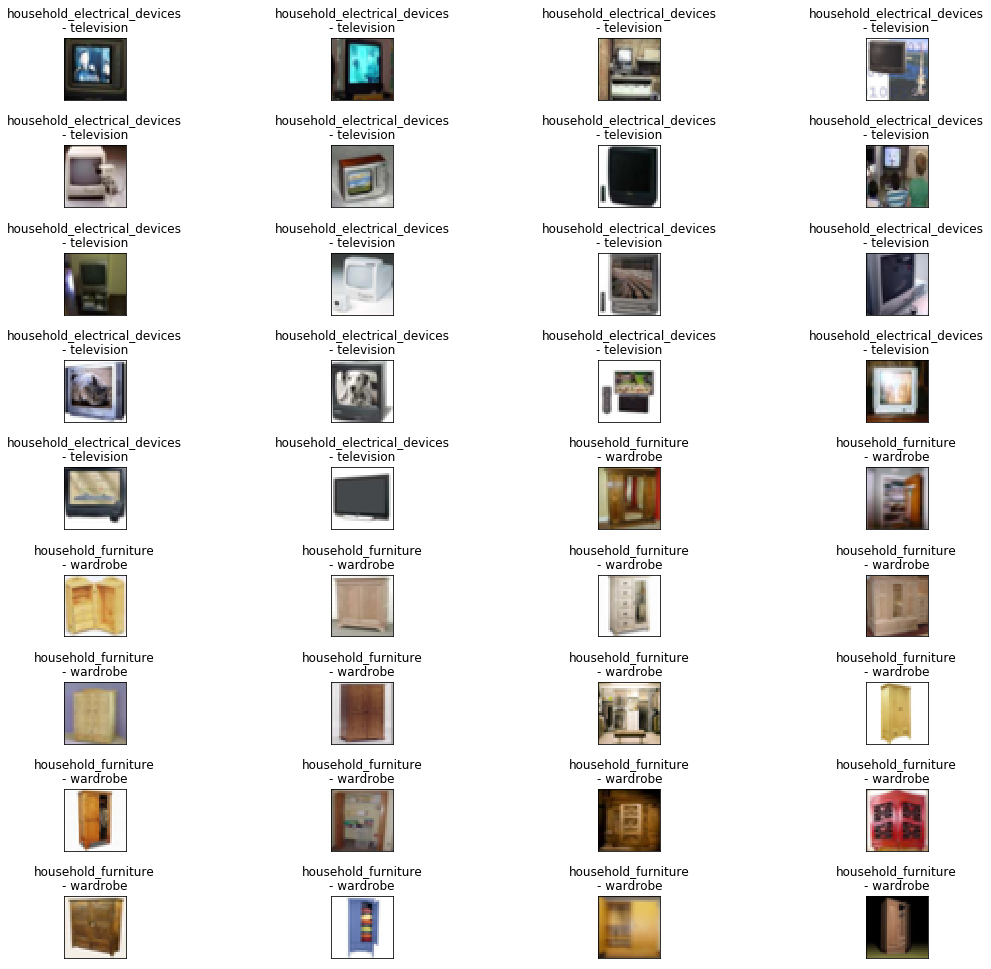

In [0]:
import matplotlib.pyplot as plt

# initialize the dict, the key is the ten fine class, the count is 0 
counts = dict.fromkeys(('television', 'wardrobe'), 0) 

fig = plt.figure(figsize=(15, 15))

index = 0
for sample in samples:
  counts[sample.fine] += 1
  if counts[sample.fine] > 18:
    continue
  
  img = sample.data.reshape(3,32,32).transpose([1, 2, 0])
  fig.add_subplot(10, 4, index+1, xticks=[], yticks=[])
  plt.imshow(img)
  plt.title("{}\n- {}".format(sample.coarse, sample.fine))
  index += 1
      
fig.set_tight_layout(True)

#<font color=blue> Generating Random images for prediction sample

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import FloatType
from pyspark.mllib.linalg import VectorUDT

# add two columns fine label as fine and corase label as corase,
# add the normalized data column, remove the original data column 
preds_name_df1 = rfc_preds.withColumn("coarse", udf(lambda coarse_label: coarse_labels[coarse_label], StringType())(test_df['coarse_labels'])) \
    .withColumn("fine", udf(lambda fine_label: fine_labels[fine_label], StringType())(test_df['fine_labels']))
    

In [0]:
# generate sample data randomly
fractions = dict()
for fine in ['clock', 'keyboard', 'lamp', 'telephone', 'television','bed', 'chair', 'couch', 'table', 'wardrobe']:
  fractions[fine] = 0.4

sample_df = preds_name_df1.sampleBy('fine', fractions)
sample_df.count()

526

In [0]:
samples = sample_df.select('coarse', 'fine', 'data','labelindex','prediction').orderBy('coarse', 'fine').rdd.collect()

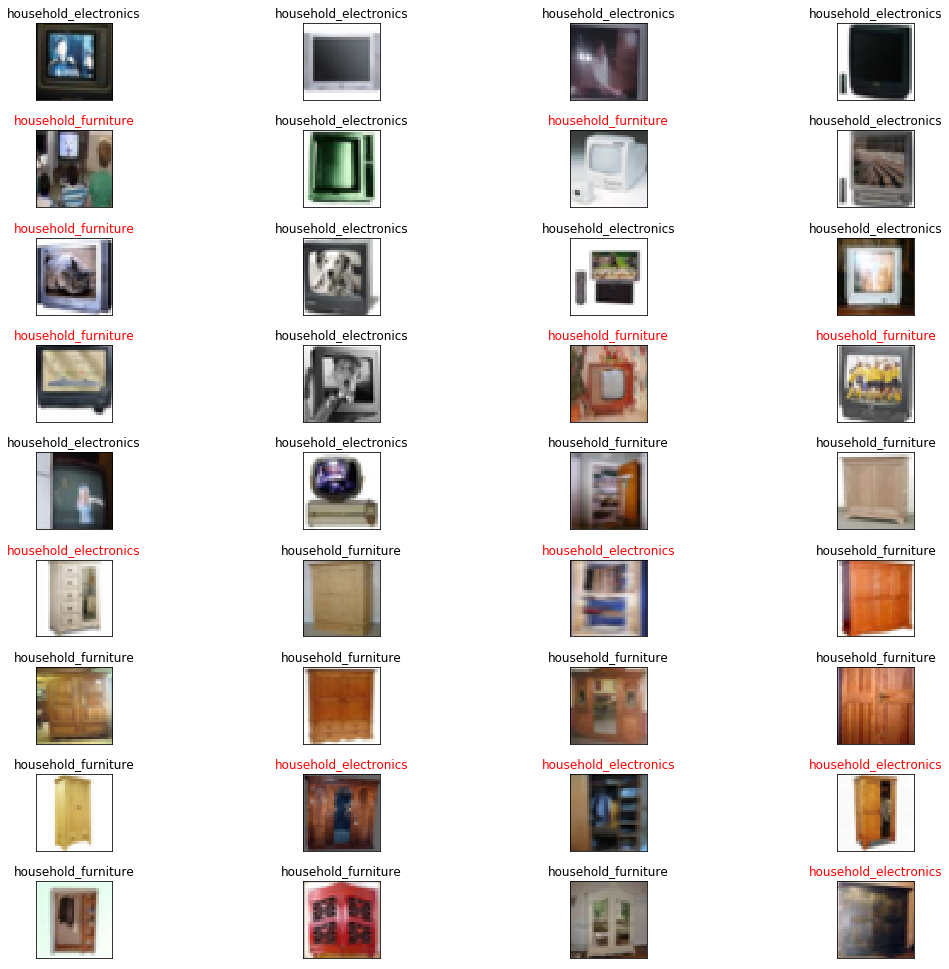

In [0]:
import matplotlib.pyplot as plt

# initialize the dict, the key is the ten fine class, the count is 0 
counts = dict.fromkeys(('television','wardrobe'), 0) 

fig = plt.figure(figsize=(15, 15))

index = 0
for sample in samples:
  counts[sample.fine] += 1
  if counts[sample.fine] > 18:
    continue
  
  img = sample.data.reshape(3,32,32).transpose([1, 2, 0])
  p_text = "household_electronics" if sample.prediction == 0.0 else "household_furniture" 
  
  fig.add_subplot(10, 4, index+1, xticks=[], yticks=[])
  plt.imshow(img)
  #plt.title("{}\n- {}".format(sample.coarse, sample.fine))
  if sample.prediction == sample.labelindex:
    plt.title("{}".format(p_text))
  else:
    plt.title("{}".format(p_text),color="red")
  index += 1
      
fig.set_tight_layout(True)